# World-population-data-analysis-beginner

Use the "Run" button to execute the code.

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [3]:
!pip install jovian opendatasets --upgrade --quiet

In [4]:
dataset_url = 'https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset' 

In [5]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./world-population-dataset" (use force=True to force download)


In [6]:
data_dir = './world-population-dataset'
import os
os.listdir(data_dir)

['world_population.csv', 'List of the Countries and Territories.txt']

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
population_df = pd.read_csv('world-population-dataset/world_population.csv')
population_df

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


In [9]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [54]:
population_df.rename(columns = {'Density (per km²)':'Density (per sq. km)'}, inplace = True)
population_df

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per sq. km),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


In [55]:
sorted_population = population_df.sort_values(by = 'Rank').reset_index(drop=True)

**NOTE:** <br />
*reset_index* is used to reset the original data frame index starting from 0.<br />
The indexing got disrupted due to *sort_values*.

I don't know exactly what *drop* attribute does, but i know how it is helping me, if you can explain please let me know.

In [56]:
sorted_population

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per sq. km),Growth Rate,World Population Percentage
0,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
1,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
2,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24
3,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45
4,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,MSR,Montserrat,Brades,North America,4390,4500,5059,4938,5138,10805,11452,11402,102,43.0392,0.9939,0.00
230,231,FLK,Falkland Islands,Stanley,South America,3780,3747,3408,3187,3080,2332,2240,2274,12173,0.3105,1.0043,0.00
231,232,NIU,Niue,Alofi,Oceania,1934,1942,1847,1812,2074,2533,3637,5185,260,7.4385,0.9985,0.00
232,233,TKL,Tokelau,Nukunonu,Oceania,1871,1827,1454,1367,1666,1669,1647,1714,12,155.9167,1.0119,0.00


#### Q1. What is the name of the country with highest and lowest population?

In [57]:
print('The country with the highest population is',sorted_population['Country'].iloc[0],'and the country with the least population is',sorted_population['Country'].iloc[len(population_df.index)-1])

The country with the highest population is China and the country with the least population is Vatican City


#### Q2. List the top 20 populous countries.

In [59]:
top_10 = sorted_population.head(20)[['Rank','CCA3','Country','Capital','Continent','2020 Population','Density (per sq. km)']]
top_10

,Rank,CCA3,Country,Capital,Continent,2020 Population,Density (per sq. km)
0,1,CHN,China,Beijing,Asia,1424929781,146.8933
1,2,IND,India,New Delhi,Asia,1396387127,431.0675
2,3,USA,United States,"Washington, D.C.",North America,335942003,36.0935
3,4,IDN,Indonesia,Jakarta,Asia,271857970,144.6529
4,5,PAK,Pakistan,Islamabad,Asia,227196741,267.4018
5,6,NGA,Nigeria,Abuja,Africa,208327405,236.5759
6,7,BRA,Brazil,Brasilia,South America,213196304,25.2841
7,8,BGD,Bangladesh,Dhaka,Asia,167420951,1160.0350
8,9,RUS,Russia,Moscow,Europe,145617329,8.4636
9,10,MEX,Mexico,Mexico City,North America,125998302,64.9082


In [60]:
sr = top_10.Continent.value_counts()
sr_df = pd.DataFrame({'Continent' : sr.index, 'Count' : sr.values})

In [61]:
sr_df

,Continent,Count
0,Asia,11
1,Africa,4
2,North America,2
3,Europe,2
4,South America,1


#### Continent-wise distribution of top 10 populous countries.

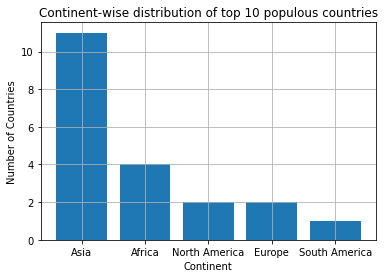

In [62]:
plt.figure(figsize=(6,4))
plt.title('Continent-wise distribution of top 10 populous countries')
plt.xlabel('Continent')
plt.ylabel('Number of Countries')
plt.grid(True)
plt.bar(sr_df.Continent,sr_df.Count);

#### Density Visualisation of 20 most populous countries.

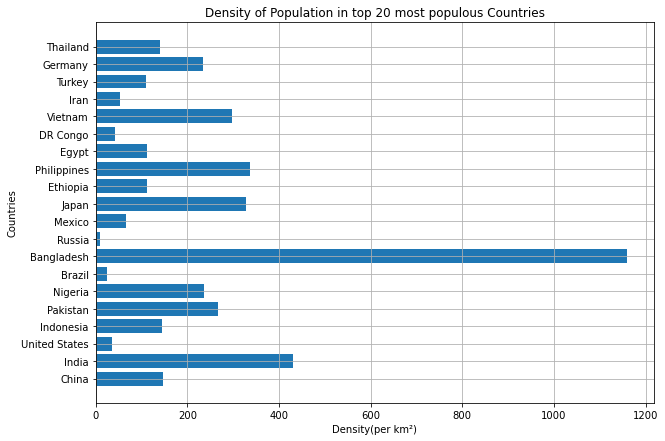

In [76]:
plt.figure(figsize=(10,7))
plt.title('Density of Population in top 20 most populous Countries')
plt.xlabel('Density(per km²)')
plt.ylabel('Countries')
plt.grid(True)
x = top_10['Density (per sq. km)']
y = top_10.Country
plt.barh(y,x);

We see that Bangladesh has exceptionally high density even while Russia has exceptionally low density of population.<br />This can tell us that the amount of land in the countries.

Let's have a look at the Area of Land in the above countries.